<a href="https://colab.research.google.com/github/lingelizabeth/senior-research/blob/master/Final_Notebook_TESS_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Load in CSV data with features**
Features are from the 'emobase' feature set in the openSMILE toolkit.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving tiffany_emobase.csv to tiffany_emobase.csv


In [0]:
from scipy.io import *
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import io
import pandas as pd
import random
from sklearn import metrics
from google.colab import files

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from scipy.interpolate import *
from scipy.signal import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical


In [0]:
df = pd.read_csv(io.StringIO(uploaded['TESSemobase.csv'].decode('utf-8')))
df

,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,...,voiceProb_sma_de_iqr1-3,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion
0,'liveturn_0',0.012500,1.464175e-06,0.000000e+00,1.464175e-06,3.300000e+01,0.000000e+00,2.161744e-07,2.042329e-10,1.961596e-07,2.242406e-07,1.039582e-13,3.226346e-07,2.153579e+00,6.997786e+00,1.685694e-08,8.268225e-08,2.443815e-07,6.582531e-08,1.616993e-07,2.275246e-07,1.092991e+00,0.000000e+00,1.092991e+00,9.700000e+01,0.000000e+00,4.466781e-01,-3.141792e-04,4.774677e-01,1.938916e-01,5.673925e-02,2.388692e-01,5.128889e-01,2.746042e+00,2.709755e-01,4.133466e-01,6.095731e-01,1.423711e-01,1.962264e-01,3.385976e-01,...,1.724564e-02,9.643398e+01,-1.177993e+02,2.142332e+02,2.500000e+01,6.000000e+00,8.385133e-01,4.072760e-03,4.393829e-01,1.891053e+01,9.843450e+02,3.137513e+01,-1.546177e-02,5.832988e+00,-7.517984e+00,0.000000e+00,6.070032e+00,7.517984e+00,6.070032e+00,1.358802e+01,6.230494e+01,-2.151940e+01,8.382434e+01,2.000000e+00,5.800000e+01,1.199496e+00,-3.467796e-02,4.597937e+00,7.752369e+00,1.344150e+02,1.176027e+01,1.801197e+00,9.904008e+00,-3.477084e+00,0.000000e+00,5.340744e+00,3.477084e+00,5.340744e+00,8.817828e+00,3
1,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,...,voiceProb_sma_de_iqr1-3,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_

In [0]:
ravdessdf = pd.read_csv(io.StringIO(uploaded['emobaseResults.csv'].decode('utf-8')), error_bad_lines=False)
ravdessdf

,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,Unnamed: 991
0,'liveturn_0',0.012500,1.362365e-07,0.000000e+00,1.362365e-07,1.440000e+02,0.000000e+00,4.216511e-09,-6.037146e-12,5.200566e-09,...,5.777043e+00,4.680230e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,NaN
1,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,NaN
2,'liveturn_0',0.012500,9.783505e-08,0.000000e+00,9.783505e-08,1.110000e+02,0.000000e+00,5.201460e-09,-9.754324e-12,6.806046e-09,...,4.334537e+00,3.254277e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,NaN
3,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,NaN
4,'liveturn_0',0.012500,1.919470e-07,0.000000e+00,1.919470e-07,1.170000e+02,5.000000e+00,5.829696e-09,-8.451469e-12,7.190383e-09,...,4.271531e+00,2.677909e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,NaN
5,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,NaN
6,'liveturn_0',0.012500,7.505621e-08,0.000000e+00,7.505621e-08,1.160000e+02,3.000000e+00,3.977657e-09,-7.269037e-12,5.111627e-09,...,4.929983e+00,3.701910e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,NaN
7,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,NaN
8,'liveturn_0',0.012500,3.667460e-08,0.000000e+00,3.667460e-08,1.680000e+02,4.000000e+00,2.035041e-09,-3.360451e-13,2.093681e-09,...,5.569057e+00,4.356706e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2,NaN
9,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,NaN


In [0]:
dropped = [i for i in range(1, ravdessdf.shape[0], 2)]
ravdessdf = ravdessdf.drop(dropped)
ravdessdf = ravdessdf.reset_index()#reindex(labels = range(df.shape[0]), axis = 0, method = 'backfill')
ravdessdf = ravdessdf.loc[:, ~ravdessdf.columns.str.contains('^Unnamed')]
ravdessdf = ravdessdf.drop([' name ', ' frameTime ', 'index'], axis=1)

r_positive = [] #1 for yes 0 for negative
for index, row in ravdessdf.iterrows():
  #print(row[' emotion '])
  if(int(row[' emotion ']) in [1, 2, 3, 8]): #classes are still 1-8 not 1-0, we don't need to one-hot here
    r_positive.append(1)
  else:
    r_positive.append(0)

ravdessdf['positive'] = pd.Series(positive)
ravdessdf

NameError: ignored

In [0]:
dropped = [i for i in range(1, df.shape[0], 2)]
df = df.drop(dropped)
df = df.reset_index()#reindex(labels = range(df.shape[0]), axis = 0, method = 'backfill')



In [0]:
#new_df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
new_df = df.drop(['name', 'frameTime', 'index'], axis=1)
new_df

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,mfcc_sma[1]_max,mfcc_sma[1]_min,...,voiceProb_sma_de_iqr1-3,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion
0,1.464175e-06,0.000000e+00,1.464175e-06,3.300000e+01,0.000000e+00,2.161744e-07,2.042329e-10,1.961596e-07,2.242406e-07,1.039582e-13,3.226346e-07,2.153579e+00,6.997786e+00,1.685694e-08,8.268225e-08,2.443815e-07,6.582531e-08,1.616993e-07,2.275246e-07,1.092991e+00,0.000000e+00,1.092991e+00,9.700000e+01,0.000000e+00,4.466781e-01,-3.141792e-04,4.774677e-01,1.938916e-01,5.673925e-02,2.388692e-01,5.128889e-01,2.746042e+00,2.709755e-01,4.133466e-01,6.095731e-01,1.423711e-01,1.962264e-01,3.385976e-01,2.930750e+01,-5.531705e+01,...,1.724564e-02,9.643398e+01,-1.177993e+02,2.142332e+02,2.500000e+01,6.000000e+00,8.385133e-01,4.072760e-03,4.393829e-01,1.891053e+01,9.843450e+02,3.137513e+01,-1.546177e-02,5.832988e+00,-7.517984e+00,0.000000e+00,6.070032e+00,7.517984e+00,6.070032e+00,1.358802e+01,6.230494e+01,-2.151940e+01,8.382434e+01,2.000000e+00,5.800000e+01,1.199496e+00,-3.467796e-02,4.597937e+00,7.752369e+00,1.344150e+02,1.176027e+01,1.801197e+00,9.904008e+00,-3.477084e+00,0.000000e+00,5.340744e+00,3.477084e+00,5.340744e+00,8.817828e+00,3
1,1.811099e-06,0.000000e+00,1.811099e-06,1.530000e+02,0.000000e+00,1.903698e-07,2.231987e-11,1.881490e-07,2.027691e-07,8.684970e-14,2.947056e-07,2.677518e+00,1.217278e+01,8.357888e-09,5.149468e-08,2.291753e-07,4.313680e-08,1.776807e-07,2.208175e-07,1.133544e+00,0.000000e+00,1.133544e+00,1.530000e+02,0.000000e+00,4.149727e-01,-7.473455e-04,4.893335e-01,1.999380e-01,5.975599e-02,2.482291e-01,5.271388e-01,2.576847e+00,1.971891e-01,3.789887e-01,5.851995e-01,1.817996e-01,2.062107e-01,3.880103e-01,2.979600e+01,-5.250615e+01,...,2.081368e-02,7.257629e+01,-7.339516e+01,1.459714e+02,2.600000e+01,1.780000e+02,-4.400901e-01,-4.198592e-02,3.737509e+00,1.271332e+01,4.306903e+02,2.089417e+01,-3.065700e-02,6.053485e+00,-4.110748e+00,0.000000e+00,2.989309e+00,4.110748e+00,2.989309e+00,7.100057e+00,3.450105e+01,-1.960472e+01,5.410577e+01,2.000000e+00,5.600000e+01,1.340753e+00,-2.463239e-02,3.791676e+00,5.714507e+00,7.344661e+01,8.687294e+00,5.867910e-01,4.751102e+00,-1.135715e+00,0.000000e+00,2.649446e+00,1.135715e+00,2.649446e+00,3.785162e+00,3
2,1.338246e-06,0.000000e+00,1.338246e-06,1.510000e+02,0.000000e+00,1.500240e-07,6.357056e-11,1.436987e-07,1.596913e-07,5.609143e-14,2.368647e

In [0]:
positive = [] #1 for yes 0 for negative
for index, row in df.iterrows():
  #print(row[' emotion '])
  if(int(row['emotion']) in [1, 2, 3, 8]): #classes are still 1-8 not 1-0, we don't need to one-hot here
    positive.append(1)
  else:
    positive.append(0)
#print(positive)
#print(new_df[' emotion '])
    

In [0]:
new_df['positive'] = pd.Series(positive)
new_df

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,mfcc_sma[1]_max,mfcc_sma[1]_min,...,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,positive
0,1.464175e-06,0.000000e+00,1.464175e-06,3.300000e+01,0.000000e+00,2.161744e-07,2.042329e-10,1.961596e-07,2.242406e-07,1.039582e-13,3.226346e-07,2.153579e+00,6.997786e+00,1.685694e-08,8.268225e-08,2.443815e-07,6.582531e-08,1.616993e-07,2.275246e-07,1.092991e+00,0.000000e+00,1.092991e+00,9.700000e+01,0.000000e+00,4.466781e-01,-3.141792e-04,4.774677e-01,1.938916e-01,5.673925e-02,2.388692e-01,5.128889e-01,2.746042e+00,2.709755e-01,4.133466e-01,6.095731e-01,1.423711e-01,1.962264e-01,3.385976e-01,2.930750e+01,-5.531705e+01,...,9.643398e+01,-1.177993e+02,2.142332e+02,2.500000e+01,6.000000e+00,8.385133e-01,4.072760e-03,4.393829e-01,1.891053e+01,9.843450e+02,3.137513e+01,-1.546177e-02,5.832988e+00,-7.517984e+00,0.000000e+00,6.070032e+00,7.517984e+00,6.070032e+00,1.358802e+01,6.230494e+01,-2.151940e+01,8.382434e+01,2.000000e+00,5.800000e+01,1.199496e+00,-3.467796e-02,4.597937e+00,7.752369e+00,1.344150e+02,1.176027e+01,1.801197e+00,9.904008e+00,-3.477084e+00,0.000000e+00,5.340744e+00,3.477084e+00,5.340744e+00,8.817828e+00,3,1
1,1.811099e-06,0.000000e+00,1.811099e-06,1.530000e+02,0.000000e+00,1.903698e-07,2.231987e-11,1.881490e-07,2.027691e-07,8.684970e-14,2.947056e-07,2.677518e+00,1.217278e+01,8.357888e-09,5.149468e-08,2.291753e-07,4.313680e-08,1.776807e-07,2.208175e-07,1.133544e+00,0.000000e+00,1.133544e+00,1.530000e+02,0.000000e+00,4.149727e-01,-7.473455e-04,4.893335e-01,1.999380e-01,5.975599e-02,2.482291e-01,5.271388e-01,2.576847e+00,1.971891e-01,3.789887e-01,5.851995e-01,1.817996e-01,2.062107e-01,3.880103e-01,2.979600e+01,-5.250615e+01,...,7.257629e+01,-7.339516e+01,1.459714e+02,2.600000e+01,1.780000e+02,-4.400901e-01,-4.198592e-02,3.737509e+00,1.271332e+01,4.306903e+02,2.089417e+01,-3.065700e-02,6.053485e+00,-4.110748e+00,0.000000e+00,2.989309e+00,4.110748e+00,2.989309e+00,7.100057e+00,3.450105e+01,-1.960472e+01,5.410577e+01,2.000000e+00,5.600000e+01,1.340753e+00,-2.463239e-02,3.791676e+00,5.714507e+00,7.344661e+01,8.687294e+00,5.867910e-01,4.751102e+00,-1.135715e+00,0.000000e+00,2.649446e+00,1.135715e+00,2.649446e+00,3.785162e+00,3,1
2,1.338246e-06,0.000000e+00,1.338246e-06,1.510000e+02,0.000000e+00,1.500240e-07,6.357056e-11,1.436987e-07,1.596913e-07,5.609143e-14,2.368647e-07,2.645081e+00,1.085436e+01,8.24917

In [0]:
#SCALE THE DATA
scaler = StandardScaler()
print(scaler.fit(new_df))
print(scaler.mean_.size)
scaled_new_df = scaler.fit_transform(new_df)

StandardScaler(copy=True, with_mean=True, with_std=True)
990


In [0]:
scaled_new_df = pd.DataFrame(scaled_new_df, index = range(0, scaled_new_df.shape[0]), columns = new_df.columns.values)
scaled_new_df = scaled_new_df.drop(['emotion', 'positive'], axis=1)
scaled_new_df

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,mfcc_sma[1]_max,mfcc_sma[1]_min,...,voiceProb_sma_de_iqr2-3,voiceProb_sma_de_iqr1-3,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
0,-0.541741,-0.165073,-0.541741,-1.057407,-0.294749,-0.577746,0.312828,-0.574656,-0.557998,-0.251123,-0.547531,-0.705389,-0.749567,-0.497096,-0.572123,-0.571734,-0.565944,-0.547172,-0.567376,-0.910132,-0.672365,-0.901636,0.176990,-0.324964,-0.714492,0.094803,-0.633960,-0.749242,-0.670725,-0.809863,-0.354460,-0.321672,-0.349050,-0.671702,-0.688638,-0.807095,-0.569326,-0.721913,1.233809,-0.061893,...,-0.308284,-0.055736,-0.049251,-1.196325,0.707471,-0.528177,-1.130025,0.227628,1.225073,-1.394265,1.650490,1.485390,1.416139,-0.574505,-0.953529,-2.177460,0.215175,1.127455,2.204112,1.129989,1.729224,0.962266,-0.771414,1.079540,-0.837986,-0.752221,-0.200990,-0.314810,0.413579,2.062043,1.782280,1.611712,-0.871542,-0.937723,-2.452795,-0.098963,2.087933,2.527921,2.163567,2.582346
1,-0.518678,-0.165073,-0.518678,1.239589,-0.294749,-0.599269,0.284781,-0.579783,-0.573037,-0.251667,-0.559401,-0.183882,-0.144893,-0.691543,-0.693814,-0.582475,-0.668751,-0.533979,-0.572207,-0.839482,-0.672365,-0.829843,1.264389,-0.324964,-0.897759,-0.274842,-0.580240,-0.693622,-0.643493,-0.738372,-0.315970,-0.478831,-1.131762,-0.896461,-0.780494,-0.351022,-0.498314,-0.483820,1.303512,0.470383,...,-0.480155,0.304863,-1.266209,0.734368,-1.111569,-0.513537,0.997203,-1.413950,-0.468141,0.148424,0.130599,-0.478893,-0.390729,-0.590890,-0.909698,-0.615412,0.215175,0.054732,0.640617,0.036728,0.324640,-1.102781,-0.491282,-0.680469,-0.837986,-0.787695,0.065626,0.234802,-0.164297,0.659048,0.066745,0.161252,-1.801217,-1.557251,0.162809,-0.098963,0.390457,-0.193517,0.415559,0.221990
2,-0.550113,-0.165073,-0.550113,1.201306,-0.294749,-0.632922,0.291141,-0.608238,-0.603209,-0.252646,-0.583983,-0.216169,-0.298944,-0.694030,-0.694511,-0.610883,-0.669068,-0.567035,-0.601099,-1.029562,-0.672365,-1.022996,0.079901,-0.324964,-1.069212,0.041443,-0.881485,-0.855368,-0.743304,-0.940641,-0.390068,-0.437317,-1.126474,-1.054938,-0.929957,-0.637010,-0.608084,-0.677319,0.924674,0.244664,...,-0.092635,0.039967,0.489630,-0.750907,0.716006,-0.879542,0.885894,0.994552,0.571235,-0.289956,1.603919,1.386804,1.340847,-0.457939,-0.859792,-2.199055,0.215175,1.180817,2.225727,1.184372,1.772598,0.511672,-1.193386,0.891053,-0.837986,-0.681272,1.1220

In [0]:
#SCALE THE RAVDESS DATA
scaler = StandardScaler()
print(scaler.fit(ravdessdf))
print(scaler.mean_.size)
scaled_r_df = scaler.fit_transform(ravdessdf)

scaled_r_df = pd.DataFrame(scaled_r_df, index = range(0, scaled_r_df.shape[0]), columns = ravdessdf.columns.values)
scaled_r_df = scaled_r_df.drop([' emotion ', 'positive'], axis=1)
scaled_r_df

NameError: ignored

In [0]:
#RANDOM FOREST FOR RAVDESS
from sklearn.metrics import confusion_matrix
Xr_train, Xr_val, yr_train, yr_val = train_test_split(scaled_r_df, ravdessdf['positive'], test_size = .25, random_state = None)

ravdess_rf = RandomForestClassifier(n_estimators=99, criterion='gini', max_depth=5, min_samples_split = 6, min_samples_leaf=3, max_features=50, random_state=None)
ravdess_rf.fit(Xr_train, yr_train)
yr_predict = ravdess_rf.predict(Xr_val)
print(confusion_matrix(yr_val, yr_predict))
print(accuracy_score(yr_val, yr_predict))

[[198  13]
 [ 33 107]]
0.8689458689458689


In [0]:
#gridsearch!!
parameters = {'min_samples_split':[6, 7, 9], 'min_samples_leaf':[3, 4], 'max_features': [18, 20, 50]}
rf = RandomForestClassifier(n_estimators = 99, criterion = 'gini', max_depth = 7)
clf = GridSearchCV(rf, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=99, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [6, 7, 9], 'min_samples_leaf': [3, 4], 'max_features': [18, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
#gridsearch for SVM and split data
X_train, X_val, y_train, y_val = train_test_split(scaled_new_df, new_df['positive'], test_size = .25, random_state = None)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear','rbf'], 'gamma':[0.001, 0.01, 0.1, 1]}
test_svm = svm.SVC(gamma='scale')
gridsearchsvm = GridSearchCV(test_svm, param_grid, cv=5)
gridsearchsvm.fit(X_train, y_train)


KeyboardInterrupt: ignored

In [0]:
#svm split w/o gridsearching lol
X_train, X_val, y_train, y_val = train_test_split(scaled_new_df, new_df['positive'], test_size = .25, random_state = None)


In [0]:
gridsearchsvm.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [0]:
#model for SVM

svm = svm.SVC(C=1, gamma=.001, kernel='rbf')
svm.fit(X_train, y_train)
svm_y_predict = svm.predict(X_val)
print(confusion_matrix(y_val, svm_y_predict))
print(accuracy_score(y_val, svm_y_predict))

[[346   0]
 [  1 237]]
0.9982876712328768


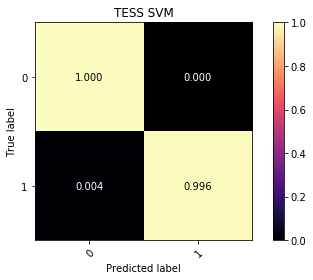

In [0]:
cm = confusion_matrix(y_val, svm_y_predict)
cm[cm == np.nan] = 0
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.magma )
# plt.colorbar()
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# plt.grid(False)
    
fig, ax = plt.subplots()

im = ax.imshow(cm, interpolation='nearest', cmap = plt.cm.magma )
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
  yticks=np.arange(cm.shape[0]),
  # ... and label them with the respective list entries
  xticklabels=[0, 1], yticklabels=[0,1],
  title="TESS SVM",
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.3f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, format(cm[i, j], fmt),
      ha="center", va="center",
      color="white" if cm[i, j] < thresh else "black")
fig.tight_layout()



In [0]:
clf.best_params_

{'max_features': 50, 'min_samples_leaf': 3, 'min_samples_split': 6}

In [0]:
from sklearn.metrics import confusion_matrix
X_train, X_val, y_train, y_val = train_test_split(scaled_new_df, new_df['positive'], test_size = .25, random_state = None)

rf = RandomForestClassifier(n_estimators=99, criterion='gini', max_depth=3, min_samples_split = 6, min_samples_leaf=3, max_features=50, random_state=None)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_val)
print(confusion_matrix(y_val, y_predict))
print()

[[332   2]
 [ 17 233]]



In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_predict))

0.9674657534246576


In [0]:
misclassified = []
for i in range(len(y_predict)):
  if y_predict[i] != list(y_val)[i]:
    #print(y_predict[i], list(y_val)[i], new_df[' emotion '][y_val.index[i]])
    misclassified.append(new_df['emotion'][y_val.index[i]])
#print(misclassified)
dict((x,misclassified.count(x)) for x in set(misclassified))

{'1': 7, '3': 1, '6': 2, '8': 9}

In [0]:
new_df[' emotion '].shape
new_df.shape

(1403, 989)

JUST CLASSIFYING HAPPY VS SAD

In [0]:
happysad = [] #1 for yes 0 for negative
indices = []
for index, row in df.iterrows():
  #print(row[' emotion '])
  if(int(row[' emotion ']) in [3]): #classes are still 1-8 not 1-0, we don't need to one-hot here
    happysad.append(1)
  elif(int(row[' emotion ']) in [4]):
    happysad.append(0)
  else:
    indices.append(index)
print(happysad)
print(indices)
#print(new_df[' emotion '])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
from sklearn.metrics import confusion_matrix
X_train, X_val, y_train, y_val = train_test_split(scaled_new_df.drop(indices), happysad, test_size = .25, random_state = None)

happysad_rf = RandomForestClassifier(n_estimators=99, criterion='gini', max_depth=5, min_samples_split = 2, min_samples_leaf=3, max_features=50, random_state=None)
happysad_rf.fit(X_train, y_train)
y_predict = happysad_rf.predict(X_val)
print(confusion_matrix(y_val, y_predict))
print()

[[48  0]
 [ 4 40]]



In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_predict))

0.9565217391304348


only actor 1 data, only f1 and f2 (formants) as data. ~ 20% accuracy.

NEURAL NET STARTS BELOW

In [0]:
from sklearn import preprocessing
normal_df = pd.DataFrame()
for col in new_df.columns.values:
  normal_df[col] = preprocessing.scale(new_df[col]) 
  #new_df[col]/max(np.array(new_df[col]))
  #print(type(test_col), test_col.shape)
  #print(max(np.array(new_df[col])))
normal_df

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,mfcc_sma[1]_max,mfcc_sma[1]_min,...,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,positive
0,-0.541741,-0.165073,-0.541741,-1.057407,-0.294749,-0.577746,0.312828,-0.574656,-0.557998,-0.251123,-0.547531,-0.705389,-0.749567,-0.497096,-0.572123,-0.571734,-0.565944,-0.547172,-0.567376,-0.910132,-0.672365,-0.901636,0.176990,-0.324964,-0.714492,0.094803,-0.633960,-0.749242,-0.670725,-0.809863,-0.354460,-0.321672,-0.349050,-0.671702,-0.688638,-0.807095,-0.569326,-0.721913,1.233809,-0.061893,...,-0.049251,-1.196325,0.707471,-0.528177,-1.130025,0.227628,1.225073,-1.394265,1.650490,1.485390,1.416139,-0.574505,-0.953529,-2.177460,0.215175,1.127455,2.204112,1.129989,1.729224,0.962266,-0.771414,1.079540,-0.837986,-0.752221,-0.200990,-0.314810,0.413579,2.062043,1.782280,1.611712,-0.871542,-0.937723,-2.452795,-0.098963,2.087933,2.527921,2.163567,2.582346,-1.000529,1.185827
1,-0.518678,-0.165073,-0.518678,1.239589,-0.294749,-0.599269,0.284781,-0.579783,-0.573037,-0.251667,-0.559401,-0.183882,-0.144893,-0.691543,-0.693814,-0.582475,-0.668751,-0.533979,-0.572207,-0.839482,-0.672365,-0.829843,1.264389,-0.324964,-0.897759,-0.274842,-0.580240,-0.693622,-0.643493,-0.738372,-0.315970,-0.478831,-1.131762,-0.896461,-0.780494,-0.351022,-0.498314,-0.483820,1.303512,0.470383,...,-1.266209,0.734368,-1.111569,-0.513537,0.997203,-1.413950,-0.468141,0.148424,0.130599,-0.478893,-0.390729,-0.590890,-0.909698,-0.615412,0.215175,0.054732,0.640617,0.036728,0.324640,-1.102781,-0.491282,-0.680469,-0.837986,-0.787695,0.065626,0.234802,-0.164297,0.659048,0.066745,0.161252,-1.801217,-1.557251,0.162809,-0.098963,0.390457,-0.193517,0.415559,0.221990,-1.000529,1.185827
2,-0.550113,-0.165073,-0.550113,1.201306,-0.294749,-0.632922,0.291141,-0.608238,-0.603209,-0.252646,-0.583983,-0.216169,-0.298944,-0.694030,-0.694511,-0.610883,-0.669068,-0.567035,-0.601099,-1.029562,-0.672365,-1.022996,0.079901,-0.324964,-1.069212,0.041443,-0.881485,-0.855368,-0.743304,-0.940641,-0.390068,-0.437317,-1.126474,-1.054938,-0.929957,-0.637010,-0.608084,-0.677319,0.924674,0.244664,...,0.489630,-0.750907,0.716006,-0.879542,0.885894,0.994552,0.571235,-0.289956,1.603919,1.386804,1.340847,-0.457939,-0.859792,-2.199055,0.215175,1.180817,2.225727,1.184372,1.772598,0.511672,-1.193386,0.891053,-0.837986,-0.681272,1.122043,0.315901,0.131152,0.910817,0.786293,0.799816,-0.

In [0]:
normal_df.drop([' emotion '], axis=1).values

KeyError: ignored

In [0]:
new_df.loc[y_val.index]['emotion'].astype(int)-1

In [0]:
#OLD VERSION
predicted_pos = rf.predict(scaled_new_df)
scaled_new_df['positive'] = pd.Series(predicted_pos)
#train_data, val_data, train_labels, val_labels = train_test_split(normal_df.drop(['emotion'], axis=1), new_df['emotion'].astype(int)-1, test_size = .5, random_state = None)
train_data, val_data, train_labels, val_labels = train_test_split(scaled_new_df.loc[X_train.index], new_df.loc[y_train.index]['emotion'].astype(int)-1, test_size = .5, random_state = None)
print(train_data.shape)

#new_df.drop([' emotion '], axis=1).shape

train_data = np.array(train_data).reshape((train_data.shape[0], train_data.shape[1], 1))#normal_df.drop([' emotion '], axis=1).values.reshape((1403, 989, 1))
train_data.shape

(875, 989)


(875, 989, 1)

In [0]:
#NEW VERSION W SVM
predicted_pos = svm.predict(scaled_new_df)
scaled_new_df['positive'] = pd.Series(predicted_pos)
#train_data, val_data, train_labels, val_labels = train_test_split(normal_df.drop(['emotion'], axis=1), new_df['emotion'].astype(int)-1, test_size = .5, random_state = None)
train_data, val_data, train_labels, val_labels = train_test_split(scaled_new_df.loc[X_train.index], new_df.loc[y_train.index]['emotion'].astype(int)-1, test_size = .5, random_state = None)
print(train_data.shape)

#new_df.drop([' emotion '], axis=1).shape

train_data = np.array(train_data).reshape((train_data.shape[0], train_data.shape[1], 1))#normal_df.drop([' emotion '], axis=1).values.reshape((1403, 989, 1))
train_data.shape

(875, 989)


(875, 989, 1)

In [0]:
set(new_df['emotion'].astype(int)) #this just checks if we have all the emotions

{1, 3, 4, 5, 6, 7, 8}

In [0]:
model = []
model = tf.keras.Sequential()
model.add(Dense(4, input_shape = train_data[0].shape))
#model.add(Dense(64))
model.add(Dense(4, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(.25))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)) 
model.add(tf.keras.layers.Dense(8, activation = tf.nn.softmax)) 
  
#rms = tf.keras.optimizers.RMSprop(lr=0.05, rho=0.9, epsilon=None, decay=0.00)
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
#model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics =["accuracy"])
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics =["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 989, 4)            8         
_________________________________________________________________
dense_5 (Dense)              (None, 989, 4)            20        
_________________________________________________________________
dropout_2 (Dropout)          (None, 989, 4)            0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 989, 4)            16        
_________________________________________________________________
dense_6 (Dense)              (None, 989, 2)            10        
_________________________________________________________________
dropout_3 (Dropout)          (None, 989, 2)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1978)              0         
__________

In [0]:
y = model.fit(train_data, to_categorical(train_labels), verbose = True, epochs = 120, validation_split = .2) #to_categorical(new_df[' emotion ']-1) #or positive

Train on 700 samples, validate on 175 samples
Epoch 1/120
700/700 [==============================] - 0s 647us/sample - loss: 2.4999 - acc: 0.1571 - val_loss: 2.1520 - val_acc: 0.1314
Epoch 2/120
700/700 [==============================] - 0s 210us/sample - loss: 2.2886 - acc: 0.1986 - val_loss: 2.0967 - val_acc: 0.1600
Epoch 3/120
700/700 [==============================] - 0s 212us/sample - loss: 2.2549 - acc: 0.1971 - val_loss: 2.0356 - val_acc: 0.2000
Epoch 4/120
700/700 [==============================] - 0s 207us/sample - loss: 2.0760 - acc: 0.2314 - val_loss: 1.9655 - val_acc: 0.2343
Epoch 5/120
700/700 [==============================] - 0s 213us/sample - loss: 2.0003 - acc: 0.2529 - val_loss: 1.8776 - val_acc: 0.3086
Epoch 6/120
700/700 [==============================] - 0s 225us/sample - loss: 1.9854 - acc: 0.2729 - val_loss: 1.7694 - val_acc: 0.4229
Epoch 7/120
700/700 [==============================] - 0s 214us/sample - loss: 1.8279 - acc: 0.3214 - val_loss: 1.6519 - val_acc: 0.

In [0]:
#SAVE THE MODEL FOR TRANSFER LEARNING
# Create a saver.
saver = tf.train.Saver(...variables...)
# Launch the graph and train, saving the model every 1,000 steps.
sess = tf.Session()
for step in xrange(1000000):
    sess.run(..training_op..)
    if step % 1000 == 0:
        # Append the step number to the checkpoint name:
        saver.save(sess, 'my-model', global_step=step)

array([[1.6044897e-03, 7.3697993e-05, 7.8620948e-04, ..., 3.1859023e-04,
        9.8970640e-01, 3.0928813e-03],
       [7.7758501e-05, 6.1601586e-06, 1.2535775e-04, ..., 7.6782550e-03,
        3.7626177e-04, 2.5605692e-03],
       [2.2073975e-04, 1.1422687e-05, 1.8281296e-03, ..., 5.3097770e-02,
        8.9373428e-04, 1.0084723e-02],
       ...,
       [3.0156043e-03, 2.3133845e-04, 9.5397645e-01, ..., 7.9742689e-03,
        2.1040607e-03, 1.0933977e-03],
       [1.1927332e-03, 3.2339492e-04, 7.2678286e-01, ..., 9.7775217e-03,
        2.3684416e-02, 2.2365880e-01],
       [8.5509376e-04, 7.1988630e-05, 2.3631947e-03, ..., 3.9499727e-04,
        9.8389488e-01, 5.1839702e-04]], dtype=float32)

In [0]:
#r_predicted_pos = ravdess_rf.predict(scaled_r_df)
#scaled_r_df['positive'] = pd.Series(r_predicted_pos)

ravdess_test_data = np.array(scaled_r_df).reshape((scaled_r_df.shape[0], scaled_r_df.shape[1], 1))
ravdess_y_pred = model.predict(ravdess_test_data)
print(confusion_matrix(ravdessdf[' emotion '].astype(int)-1, np.argmax(ravdess_y_pred, axis = 1)))
print(accuracy_score(ravdessdf[' emotion '].astype(int)-1, np.argmax(ravdess_y_pred, axis = 1)))

[[  8   0  10  35   5   3  29   2]
 [  9   0  16 118   2  14  23   2]
 [ 18   0  21  25  55  11  29  27]
 [  3   0  26  61  33  15  32  20]
 [  2   0  15   8 101   5  29  25]
 [  3   0  17  25  72  19  17  31]
 [ 10   0  14  46  35  16  45  25]
 [ 12   0  45  30  41  17  24  22]]
0.19743406985032075


In [0]:
#RESULTS ON VALIDATION DATA FROM 2ND SPLIT FOR OLD RANDOM FOREST

val_data = np.array(val_data).reshape((val_data.shape[0], val_data.shape[1], 1)) #reshape the validation data to input into the model

y_pred_proba = model.predict(val_data)
print(confusion_matrix(val_labels, np.argmax(y_pred_proba, axis=1))) 
print(accuracy_score(val_labels, np.argmax(y_pred_proba, axis=1)))

[[ 68   0   5   0   0   0   0]
 [  0 144   0   2   0   0   7]
 [  0   0 134   0   0   0   0]
 [  0   1   0 122   0   0   0]
 [  0   0   0   1  91   0   0]
 [  0   0   1   0   0 150   0]
 [  0   3   1   0   2   3 140]]
0.9702857142857143


In [0]:
#RESULTS ON VALIDATION DATA FROM 2ND SPLIT FOR SVM

val_data = np.array(val_data).reshape((val_data.shape[0], val_data.shape[1], 1)) #reshape the validation data to input into the model

y_pred_proba = model.predict(val_data)
print(confusion_matrix(val_labels, np.argmax(y_pred_proba, axis=1))) 
print(accuracy_score(val_labels, np.argmax(y_pred_proba, axis=1)))

[[ 62   0   6   0   0   0   0]
 [  0 131   0   0   0   0   7]
 [  0   0 164   0   0   0   0]
 [  0   0   0 132   0   0   0]
 [  0   0   0   1  88   0   1]
 [  0   0   0   0   0 145   1]
 [  0   2   0   0   2   1 132]]
0.976


In [0]:
#RESULTS ON VALIDATION DATA FROM 1ST SPLIT

#val_data = np.array(val_data).reshape((val_data.shape[0], val_data.shape[1], 1)) #reshape the validation data to input into the model
#y_val is a pandas dataframe that contains indices and actual pos/neg labels from the first split
  #X_val shape is 584, 988
#new_df.loc[y_val.index]['emotion'] gives a df with indices and actual emotion labels from first split
  #X_val_w_positive = X_val
  #X_val = X_val.drop(['positive'], axis=1)
X_val_predicted_pos = rf.predict(X_val) #add positive column to validation data
X_val_w_positive['positive'] = X_val_predicted_pos
X_val_w_positive

X_val_w_positive = np.array(X_val_w_positive).reshape((X_val_w_positive.shape[0], X_val_w_positive.shape[1], 1)) #reshape the validation data to input into the model


y_pred_X_val = model.predict(X_val_w_positive)
print(confusion_matrix(new_df.loc[y_val.index]['emotion'].astype(int)-1, np.argmax(y_pred_X_val, axis=1))) 
print(accuracy_score(new_df.loc[y_val.index]['emotion'].astype(int)-1, np.argmax(y_pred_X_val, axis=1)))

[[ 47   0   2   0   0   0   0]
 [  0  79   0   0   0   0   2]
 [  0   0 105   0   0   0   0]
 [  0   1   0  82   0   0   0]
 [  0   0   0   0  54   0   2]
 [  0   0   1   0   0 105   1]
 [  0   4   1   1   1   1  95]]
0.9708904109589042


In [0]:
test_data = pd.read_csv(io.StringIO(uploaded['tiffany_emobase.csv'].decode('utf-8')))
test_data = test_data.drop(['id', 'name', 'emotion', 'frameTime'], axis=1)
#test_data = test_data.drop(['emotion', 'frameTime'], axis=1)
#svm.predict(test_data)
test_data['positive'] = svm.predict(test_data)

In [0]:
test_data
#ok i just realized i didn't scale this data?? maybe i should

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,mfcc_sma[1]_max,mfcc_sma[1]_min,...,voiceProb_sma_de_iqr1-3,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,positive
0,0.000053,0.0,0.000053,418.0,0.0,0.000004,-1.466152e-08,0.000009,0.000004,6.095482e-11,0.000008,3.383974,15.77883,3.696106e-08,4.373733e-07,0.000003,4.004122e-07,0.000003,0.000003,3.007297,0.0,3.007297,29.0,0.0,0.868165,-0.001806,1.442519,0.428121,0.316218,0.653089,1.035807,3.224921,0.325209,0.641552,1.250469,0.316343,0.608917,0.92526,13.74189,-32.127,...,0.045658,122.2972,-106.5613,228.8584,622.0,161.0,-3.651018e-08,-0.006032,1.918092,19.64751,1043.561,32.32323,0.005968,5.458329,-5.305835,0.0,7.912611,5.305835,7.912611,13.21845,35.24591,-18.96848,54.21439,72.0,166.0,0.584448,-0.002183,1.278758,3.856892,36.71977,6.07297,1.020721,8.196934,-1.54679,0.0,1.977029,1.54679,1.977029,3.523819,0


In [0]:
model.predict(np.array(test_data).reshape(test_data.shape[0], test_data.shape[1], 1))

array([[2.3528503e-07, 4.5681432e-08, 2.7178640e-02, 1.4097279e-07,
        3.5598394e-04, 4.4679781e-04, 1.0515617e-05, 9.7200769e-01]],
      dtype=float32)

In [0]:
X_val_w_positive.shape
#test_data.shape

(584, 989, 1)

In [0]:
#RESULTS ON VALIDATION DATA FROM 1ST SPLIT FOR SVM

#val_data = np.array(val_data).reshape((val_data.shape[0], val_data.shape[1], 1)) #reshape the validation data to input into the model
#y_val is a pandas dataframe that contains indices and actual pos/neg labels from the first split
  #X_val shape is 584, 988
#new_df.loc[y_val.index]['emotion'] gives a df with indices and actual emotion labels from first split
  X_val_w_positive = X_val
  #X_val = X_val.drop(['positive'], axis=1)
X_val_predicted_pos = svm.predict(X_val) #add positive column to validation data
X_val_w_positive['positive'] = X_val_predicted_pos
X_val_w_positive

X_val_w_positive = np.array(X_val_w_positive).reshape((X_val_w_positive.shape[0], X_val_w_positive.shape[1], 1)) #reshape the validation data to input into the model


y_pred_X_val = model.predict(X_val_w_positive)
print(confusion_matrix(new_df.loc[y_val.index]['emotion'].astype(int)-1, np.argmax(y_pred_X_val, axis=1))) 
print(accuracy_score(new_df.loc[y_val.index]['emotion'].astype(int)-1, np.argmax(y_pred_X_val, axis=1)))

[[ 45   0   0   0   0   0   0]
 [  0 100   0   0   0   0   1]
 [  0   0 103   0   0   0   0]
 [  0   0   0  86   0   0   0]
 [  0   0   0   1  56   0   0]
 [  0   1   0   0   0  98   1]
 [  0   0   0   0   0   2  90]]
0.9897260273972602


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


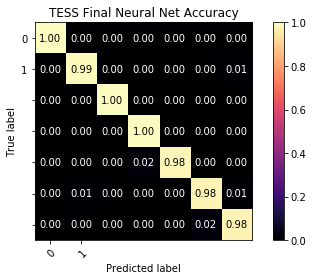

In [0]:
#cm2 is the cm for this, cm is for the svm 
#1st split svm results confusion matrix
cm2 = confusion_matrix(new_df.loc[y_val.index]['emotion'].astype(int)-1, np.argmax(y_pred_X_val, axis=1))
cm2[cm2 == np.nan] = 0
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
# plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.magma )
# plt.colorbar()
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# plt.grid(False)
    
fig, ax = plt.subplots()

im = ax.imshow(cm2, interpolation='nearest', cmap = plt.cm.magma )
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
  yticks=np.arange(cm2.shape[0]),
  # ... and label them with the respective list entries
  xticklabels=[0, 1], yticklabels=[0,1],
  title="TESS Final Neural Net Accuracy",
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm2.max() / 2.
for i in range(cm2.shape[0]):
  for j in range(cm2.shape[1]):
    ax.text(j, i, format(cm2[i, j], fmt),
      ha="center", va="center",
      color="white" if cm2[i, j] < thresh else "black")
fig.tight_layout()



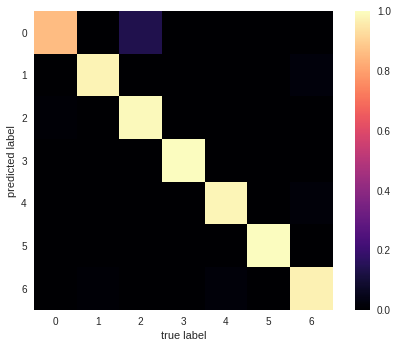

In [0]:
x`

In [0]:
#X_val = scaled_new_df.loc[y_val.index]

X_val_np = np.array(scaled_new_df.loc[X_val.index]).reshape((scaled_new_df.loc[X_val.index].shape[0], scaled_new_df.loc[X_val.index].shape[1], 1))
y_pred_proba1 = model.predict(X_val_np)
print(confusion_matrix(new_df.loc[y_val.index]['emotion'].astype(int)-1, np.argmax(y_pred_proba1, axis=1)))
print(accuracy_score(new_df.loc[y_val.index]['emotion'].astype(int)-1, np.argmax(y_pred_proba1, axis=1)))

[[ 58   0   3   0   0   0   0]
 [  1  85   0   0   0   0  14]
 [  0   0  92   0   0   0   0]
 [  0   0   0  88   0   0   0]
 [  0   0   0   0  50   0   0]
 [  0   0   1   0   0 100   0]
 [  0   1   0   1   0   0  90]]
0.964041095890411


In [0]:
type(X_val), type(y_val)

(numpy.ndarray, pandas.core.series.Series)

In [0]:
np.argmax(y_pred_proba1, axis=1)

array([4, 7, 2, 3, 7, 5, 7, 2, 6, 3, 4, 3, 2, 5, 4, 5, 4, 7, 2, 6, 6, 0,
       6, 5, 2, 7, 4, 3, 4, 7, 0, 2, 3, 4, 7, 2, 5, 6, 4, 4, 2, 0, 7, 5,
       3, 2, 3, 6, 3, 0, 3, 6, 5, 4, 3, 2, 7, 6, 4, 7, 6, 7, 7, 6, 2, 6,
       7, 6, 6, 2, 6, 2, 3, 5, 0, 7, 6, 3, 3, 0, 2, 7, 5, 6, 3, 2, 6, 3,
       7, 3, 6, 2, 0, 6, 2, 7, 6, 6, 0, 3, 6, 7, 3, 2, 7, 7, 3, 7, 2, 0,
       6, 0, 5, 6, 4, 4, 7, 3, 7, 3, 4, 4, 5, 3, 6, 5, 2, 3, 7, 4, 7, 7,
       7, 3, 6, 6, 3, 4, 6, 2, 4, 4, 2, 2, 2, 7, 6, 7, 7, 2, 3, 0, 6, 7,
       0, 2, 6, 2, 3, 3, 7, 3, 6, 2, 4, 4, 3, 5, 6, 2, 7, 2, 5, 7, 2, 7,
       3, 2, 2, 6, 6, 5, 4, 6, 3, 2, 6, 0, 4, 0, 3, 6, 4, 7, 7, 2, 0, 7,
       5, 4, 2, 4, 4, 2, 6, 7, 4, 2, 5, 6, 0, 6, 5, 3, 5, 3, 6, 2, 2, 0,
       3, 7, 0, 6, 6, 0, 2, 4, 0, 6, 2, 4, 6, 4, 6, 6, 0, 6, 3, 3, 4, 0,
       3, 3, 5, 0, 7, 3, 4, 7, 3, 7, 6, 7, 4, 7, 0, 5, 2, 7, 4, 7, 7, 2,
       0, 4, 7, 7, 6, 3, 3, 6, 7, 3, 0, 2, 7, 2, 3, 7, 2, 3, 5, 2, 4, 7,
       6, 2, 3, 4, 5, 5, 4, 0, 2, 5, 3, 5, 3, 0, 7,

In [0]:
np.argmax(y_pred_proba, axis=1)

array([7, 4, 3, ..., 3, 5, 2])

TRAIN THIS MODEL ON THE RAVDESS DATA (TRANSFER LEARNING)

In [0]:
model.add(Dense(4, activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 989, 4)            8         
_________________________________________________________________
dense_1 (Dense)              (None, 989, 4)            20        
_________________________________________________________________
dropout (Dropout)            (None, 989, 4)            0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 989, 4)            16        
_________________________________________________________________
dense_2 (Dense)              (None, 989, 2)            10        
_________________________________________________________________
dropout_1 (Dropout)          (None, 989, 2)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1978)              0         
__________